**Tarea 5 - Arboles de desición**

In [3]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [5]:
#Cargamos el dataset
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

Se registraron 891 datos y 12 columnas

In [55]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

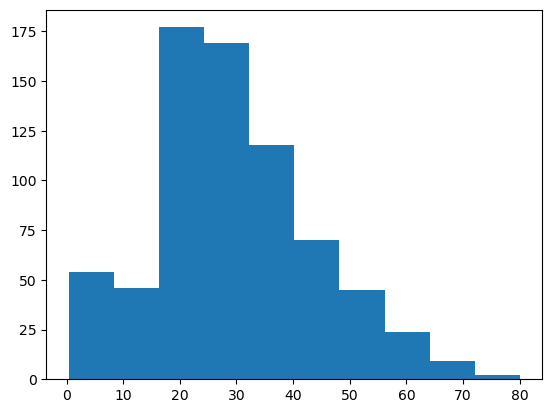

In [57]:
#Histograma realizado con la edad
plt.hist(data.Age)

Se logra identificar que la mayor cantidad de edades identificadas se encuentran entre los 18 y 25 años de edad.

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

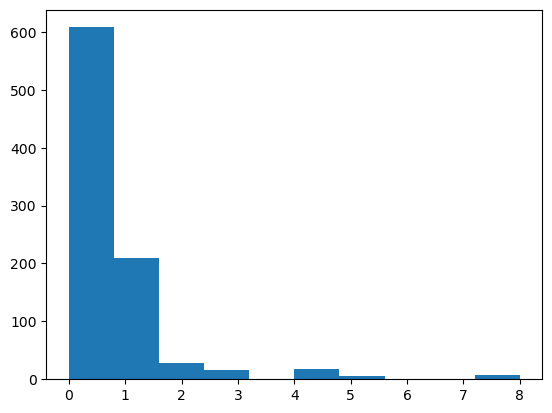

In [58]:
plt.hist(data.SibSp)

Se logra identificar que la muestra de supervivencia del titanic la mayor muestra esta en cero

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

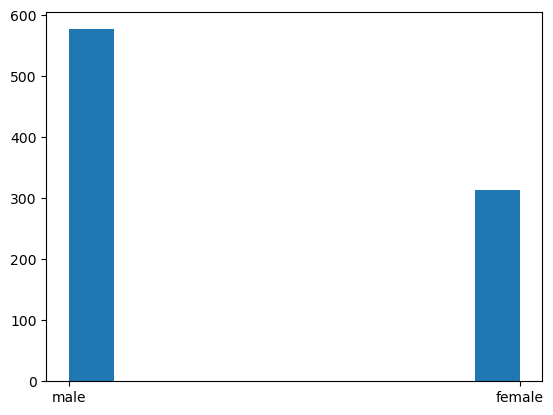

In [59]:
#Histograma realizado con el sexo
plt.hist(data.Sex)

Se logra identificar que existen mas hombres que mujeres en la base de datos 

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

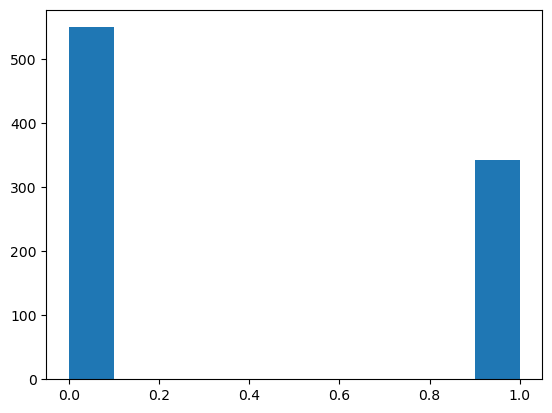

In [60]:
#Histograma realizado si sobrevivio o no
plt.hist(data.Survived)

Se logra identificar que la mayoria de pasajeros no sobrevivieron al incidente del titanic

In [65]:
predictors_col = ["PassengerId", "Survived", "Pclass", "SibSp", "Parch", "Fare"]
target_col = ['Age']

In [66]:
predictors = data[predictors_col]
target = data[target_col]

In [67]:
predictors

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,3,1,2,23.4500
889,890,1,1,0,0,30.0000


In [68]:
target

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [69]:
corr = predictors.corr()
corr

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


Se identifica una alta correlación directa entre SibSp y Pclass porque son cercanos a 1

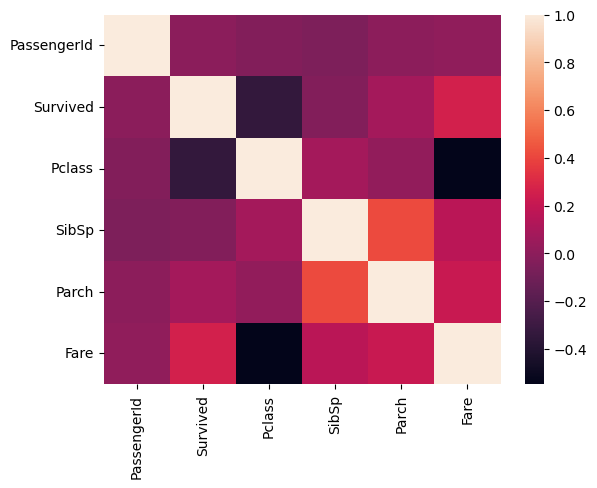

In [70]:
sns.heatmap(corr)
plt.show()

Se identifica en el mapa de color que las que tienen alta correlación entre si tienen color rosado y las de menor correlación tienen un color mas oscuro que todos

In [89]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [90]:
tree = DecisionTreeClassifier()

In [91]:
arbol = tree.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [88]:
plot_tree(arbol)

NameError: name 'arbol' is not defined

In [92]:
predicciones = arbol.predict(X_test)

NameError: name 'arbol' is not defined

In [93]:
predicciones

NameError: name 'predicciones' is not defined